In [36]:
using Pkg
Pkg.add("Distributions")
Pkg.add("Plots")
Pkg.add("DataStructures")
Pkg.add("Statistics")
using Distributions
using Plots
using DataStructures
using Statistics

   Resolving package versions...
  No Changes to `C:\Users\vinee\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\vinee\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\vinee\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\vinee\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\vinee\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\vinee\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\vinee\.julia\environments\v1.7\Project.toml`
  [10745b16] + Statistics
  No Changes to `C:\Users\vinee\.julia\environments\v1.7\Manifest.toml`


# Fix Values of Lambda and Number of samples you want to take

In [44]:
NO_SAMPLE = 1000              #NUMBER OF SAMPLES YOU WANT TO TAKE
LAMBDA = 1       

1

### Created a uniform distribution and a poisson distribution and took samples

In [45]:
Uniform_dist = Uniform()                         # U(0,1)
Poisson_dist = Poisson(LAMBDA)                   # Created just to compare our method with the one provided by julia
Uniform_samples = rand(Uniform_dist, NO_SAMPLE)  # Took samples
Poisson_samples = rand(Poisson_dist, NO_SAMPLE)

1000-element Vector{Int64}:
 0
 2
 0
 0
 1
 1
 1
 3
 1
 0
 0
 2
 1
 ⋮
 1
 0
 0
 0
 1
 2
 1
 0
 0
 0
 1
 0

##### Mean and Variance of original poisson distribution

In [46]:
mean_org = mean(Poisson_samples)
var_org = var(Poisson_samples)
println(mean_org)
println(var_org)

0.967
0.9488598598598594


### This cell computes the probability of different samples provided by poisson distribution and ploted it against x

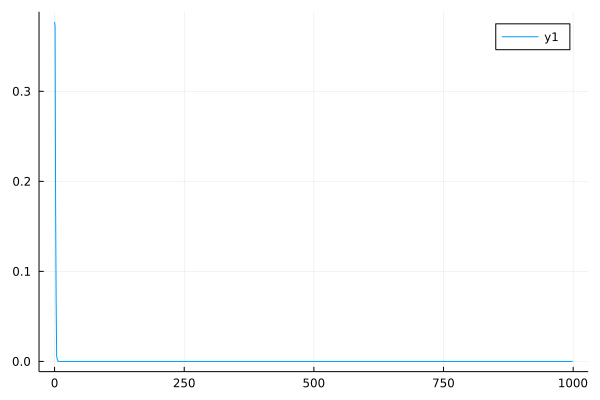

In [47]:
Counter_p = counter(Poisson_samples)
Probabilities = fill(0.0,(NO_SAMPLE))
for i in 0:NO_SAMPLE-1
    Probabilities[i+1] = Counter_p[i]/NO_SAMPLE    
end
plot(0:NO_SAMPLE-1,Probabilities)

## Main Algorithm

In [48]:
X = fill(0,(NO_SAMPLE))             # initialised the distribution with all samples going to 0
for j in 1:NO_SAMPLE
    U = Uniform_samples[j]
    i = 0
    p = ℯ^(-LAMBDA)
    A = p
    while A<1
        if U < A
            X[j] = i
            break
        else
            p = (LAMBDA/(i+1)) * p
            A = A + p
            i = i + 1
        end
    end
end

In [49]:
mean_ = mean(X)
var_ = var(X)
println(mean_)
println(var_)

0.976
1.0084324324324325


### This calculates the probability of different samples from distribution suggested by the algorithm

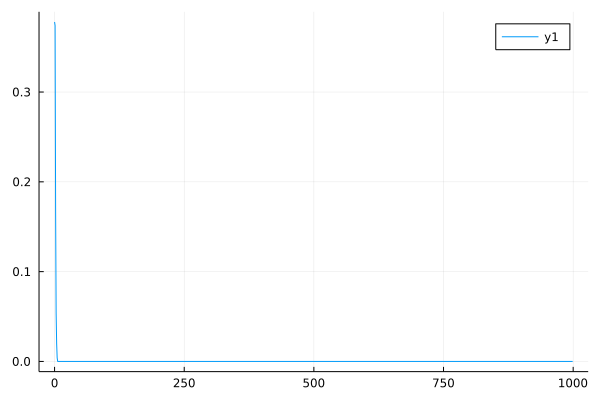

In [50]:
Counter_pn = counter(X)
Probabilities_n = fill(0.0,(NO_SAMPLE))
for i in 0:NO_SAMPLE-1
    Probabilities_n[i+1] = Counter_pn[i]/NO_SAMPLE    
end
plot(0:NO_SAMPLE-1,Probabilities_n)